#### Project Scenario

You are a Data Scientist in an epidemiology department

The government is waging a war on diabetes. and you're at the frontline. Your weapon is your Python skills, and your bullets are data

In this project, you will train a machine learning model to predict whether an individual is at the rsik of getting diabetes

#### Parts

- Part 1: Data collection and cleaning
- Part 2: Data visualization and statistics
- Part 3: Machine learning model training

## Part 1: Data collection and cleaning

In [43]:
# import our libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest

In [ ]:
# Google "early stage diabetes risk prediction dataset"
# Data source = UCI Repository

In [114]:
df = pd.read_csv("dataset 2/diabetes_data_upload.csv")

In [115]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [116]:
# shape
df.shape

(520, 17)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [118]:
# cleaning the data set
# cleaning the casing of the columns head
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [119]:
# convert to lowercase with underscores

df.columns = [x.strip().replace(" ", "_").lower() for x in df.columns]

In [120]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [121]:
# data either either True or False
# No, Negative, Female to 0
# Yes, Positive, Male to 1

df = df.replace("No",0)
df = df.replace("Negative", 0)
df = df.replace("Yes",1)
df = df.replace("Positive", 1)
df = df.replace("Male",1)
df = df.replace("Female", 0)
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [122]:
# replace gender to is_male
df = df.rename(columns = {"gender" : "is_male"})
df.columns

Index(['age', 'is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [123]:
# export dataset to csv
#df.to_csv("dataset 2/diabetes_data_clean.csv", index=None)

### Part 2: Data visualization and statistics

In [124]:
df = pd.read_csv("dataset 2/diabetes_data_clean.csv")

In [125]:
df.tail()
# age is a continous Variable
# the other columns are Categorical Variable

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <BarContainer object of 10 artists>)

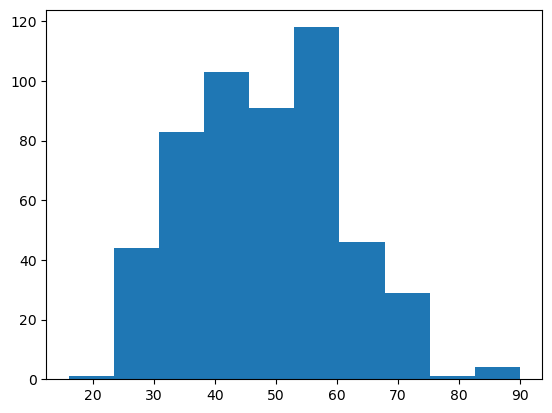

In [126]:
# examine if age is truly continous
plt.hist(df.age)

In [127]:
df.age.describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: age, dtype: float64

In [128]:
print('mean of age',df.age.mean())
print('median of age',df.age.median())
print('mode of age',df.age.mode())
# Positively Skew since
# Mean > Median > Mode on the X axis

mean of age 48.02884615384615
median of age 47.5
mode of age 0    35
Name: age, dtype: int64


In [147]:
"is_male".replace("_"," ")

'is male'

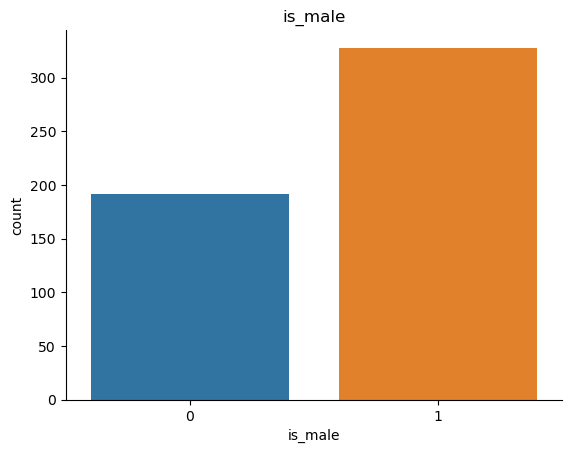

In [143]:
# create s count plot for is_male
sns.countplot(x = 'is_male', data=df)
plt.title('is male')
sns.despine()
plt.show()

In [98]:
df.is_male.value_counts()

is_male
1    328
0    192
Name: count, dtype: int64

In [145]:
columns = df.columns[1:]
columns

Index(['is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

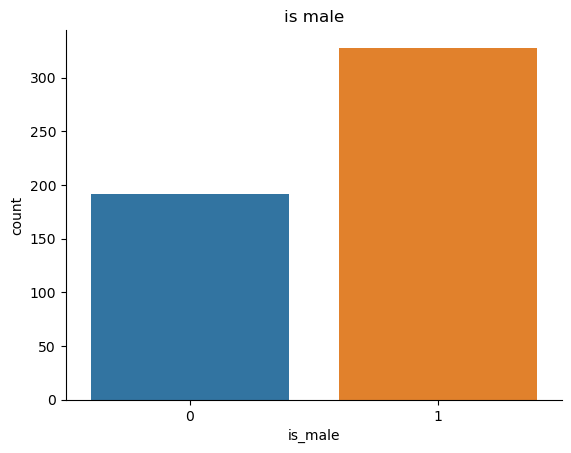

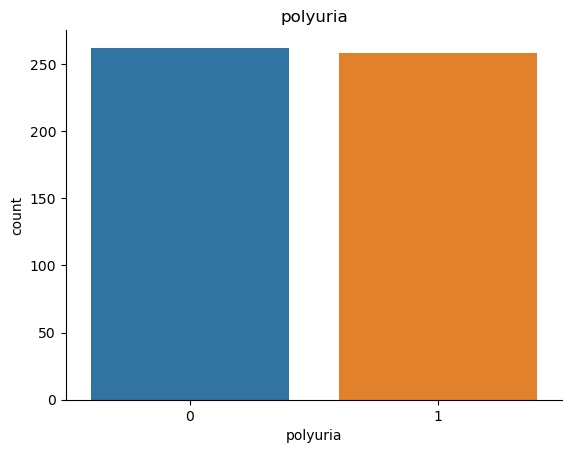

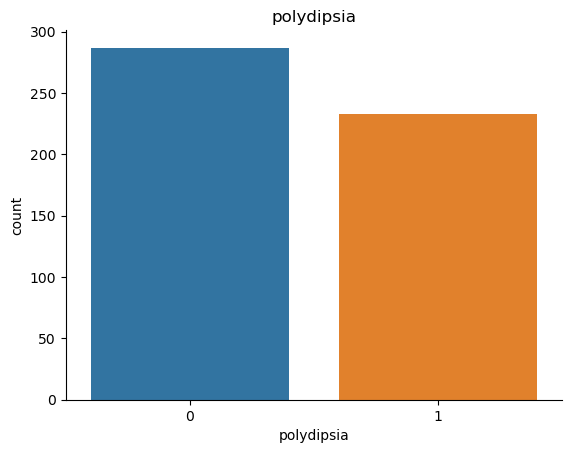

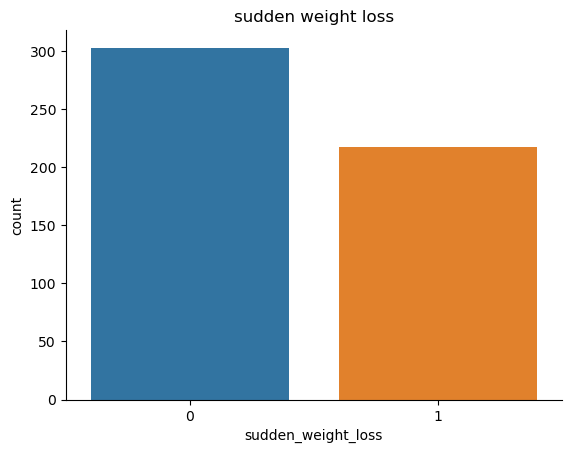

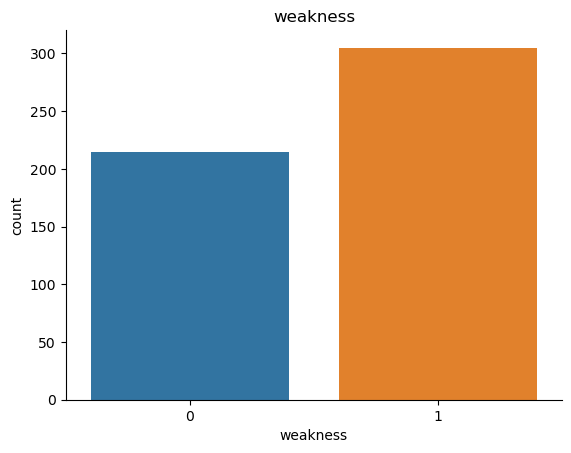

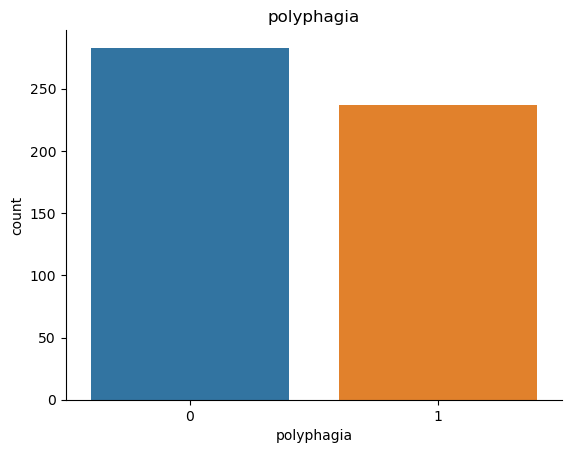

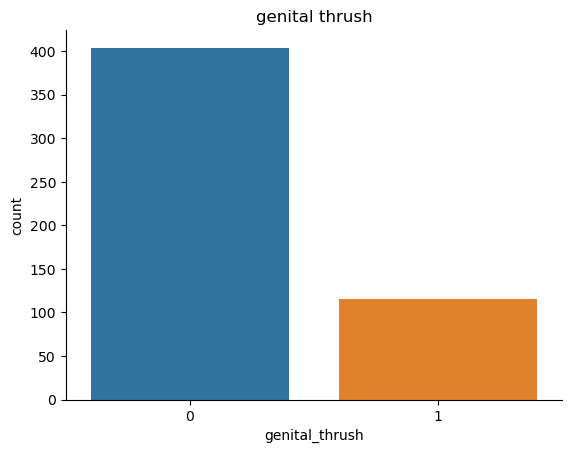

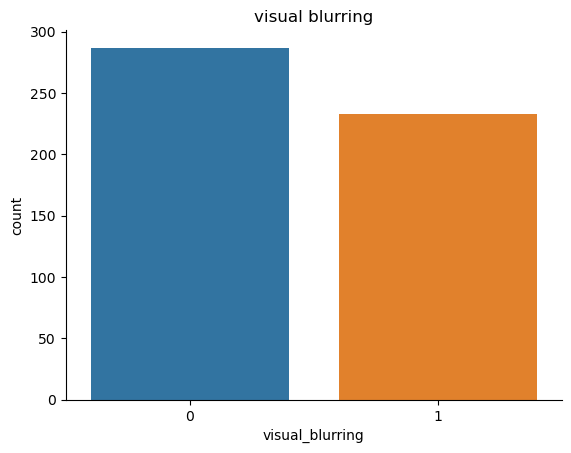

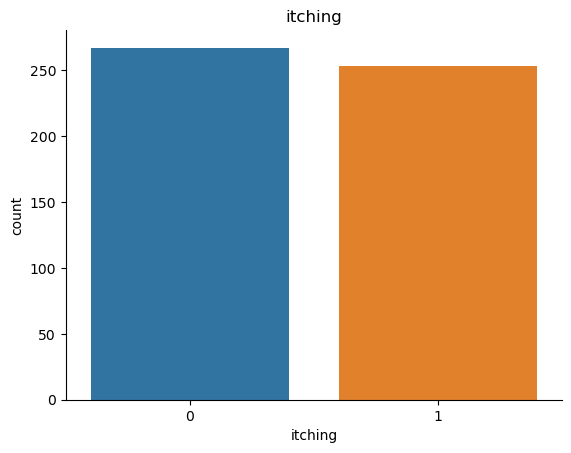

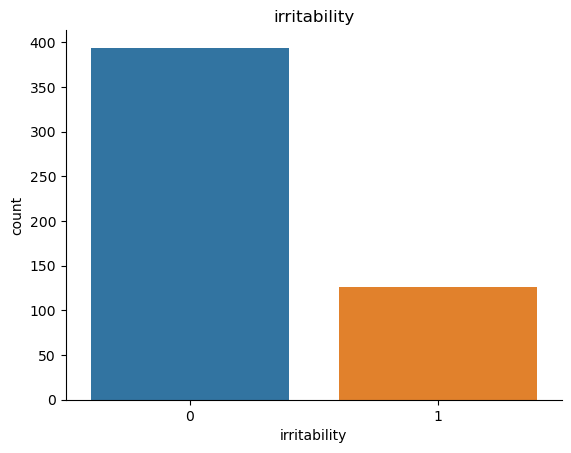

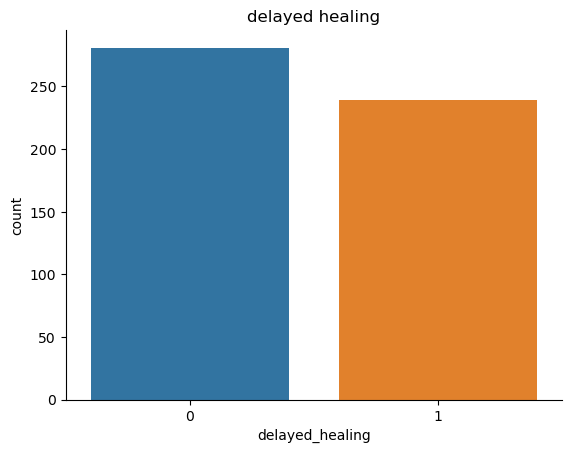

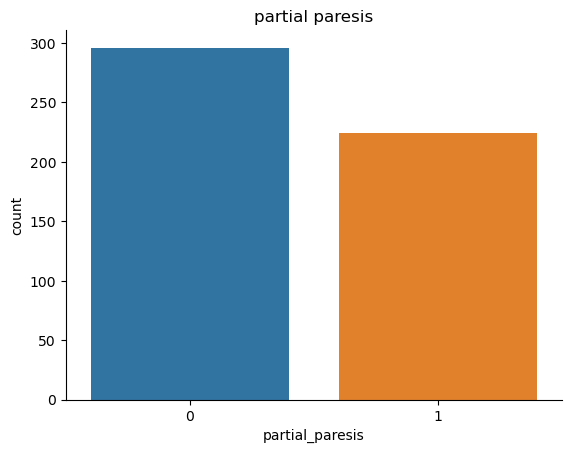

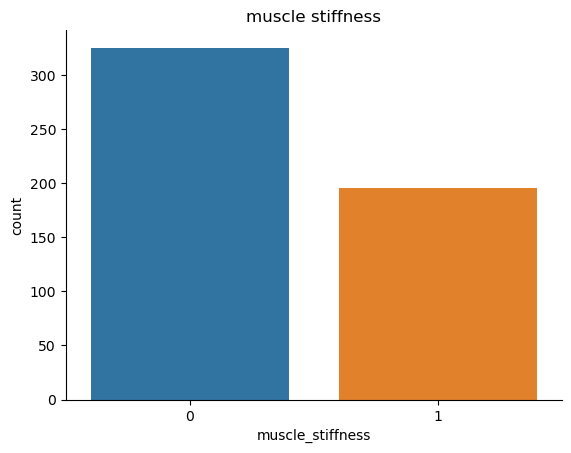

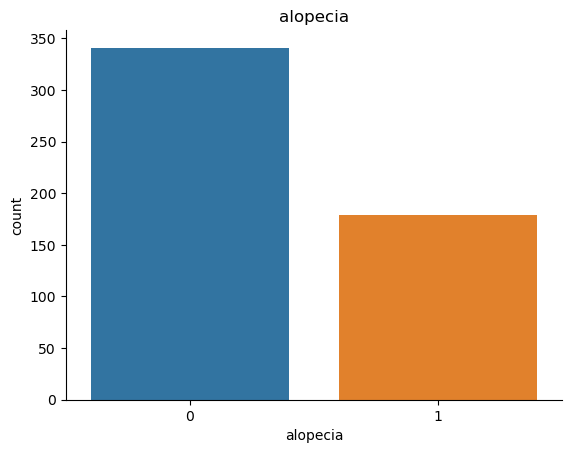

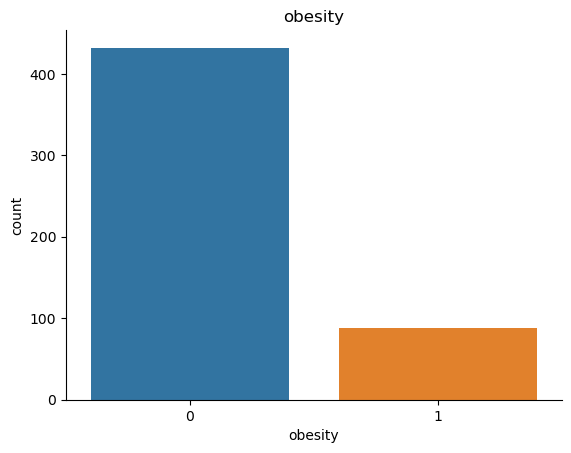

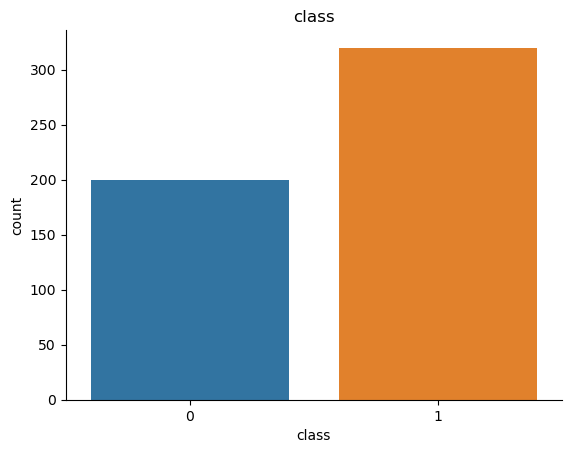

In [150]:
# iterating through all columns
# this approach is only advisible for few columns 
for column in columns:
    sns.countplot(x = column, data=df)
    plt.title(f"{column}".replace("_", " "))
    sns.despine()
    plt.show()